mu is used to represent the mean

sigma is used for standard deviation. 

Why do we use greek letters?
Greek letters are about the population 

Please draw for me a normal distribution located at 5 and with standard deviations 2.

The mean is at 5, the normal distribution peaks at five. it goes down to 3 and 7. that is a +- 1 standard deviation. 

1 standard deviations is about 66% 2/3 
2 standard deviations is 95%


Populations VS Samples
normal_distribution = stats.norm(loc=mean_μ, scale=std_σ)
normal_distribution.rvs(size=n)

rvs - random variable samples. 
multiple samples n, bigger than 1
samples are independent. (IDD)

Gamma Distributions VS Normal Distributions
gamma_distribution = \
stats.gamma(shape=shape_α, scale=scale_θ)
gamma_distribution.rvs(size)

For a distribution you need a mean and sigma? 
What is a distribution ?

What controls a distribtuion?
Mean 

Standard Deviation - (scale parameter) (do you want inches, ft...)
    if you double the scale parameter the data is going to spread out. 
    
Variance (2 std)

Skewness 

Range

Shapes - a parameter. like mean and std- (alpha is used for shape) 

Pluarality

Some distributions are skewed or not symmetrical. 

The gamma distribution has alot of choices, they can change with parameters. 

The parameters define the curve. the parameters control the way the math function looks 
A math expression, defines a curve, the parameters control the shape.

What is the diffeerence betweeen a gamma distributions parameters and a normal distributions parameters?

Gamma distribution is better for intervals (0, infinity)
Normal distribution is better for models ranging from (-infinity, infinity)


Parameters VS Statistics
shape_α and scale_θ
gamma_distribution.mean() and gamma_distribution.std()
    population mean 
gamma_distribution.rvs(size).mean() 
    calculates the sample mean


rvs.(size) are independent, but 
identically distributed from the gamma distribution. 

What is the difference between shape_a and shape_0

Parameters are numerical values like mean, std, range that describe the whole populations 

Statistics are numerical values like mean, std, range that describe a sample of the population.

Gamma distribution is defined by the shape parameters, it has characteristics like mean, std... 

The normal distribution is defined by the scale parameters, it has characteristics like the mean


In [2]:
from scipy import stats

# population
population_parameter_alpha_α = 2
population_parameter_theta_θ = 4
gamma_distribution = \
  stats.gamma(a=population_parameter_alpha_α, 
              scale=population_parameter_theta_θ)

# sample
n = 100 # adjust and experiment with this
# np.random.seed(130)
x = gamma_distribution.rvs(size=n) # "x" is a sample
# print(x)

# mean
print("The sample mean for the current sample is", x.mean()) 
# the sample mean "x-bar" is a (sample) "statistic" (not a "parameter")
# "x-bar" is the "average" of the numbers in a sample

The sample mean for the current sample is 8.034302270721748


A distribution is a math model 

A population is a hypothetical dataset / a concept, of every possible sample. 

A distribution is model of the population. 

We imagine the distribution as somthing that represents the population. 

Shows the frequency of a sample of the population. 


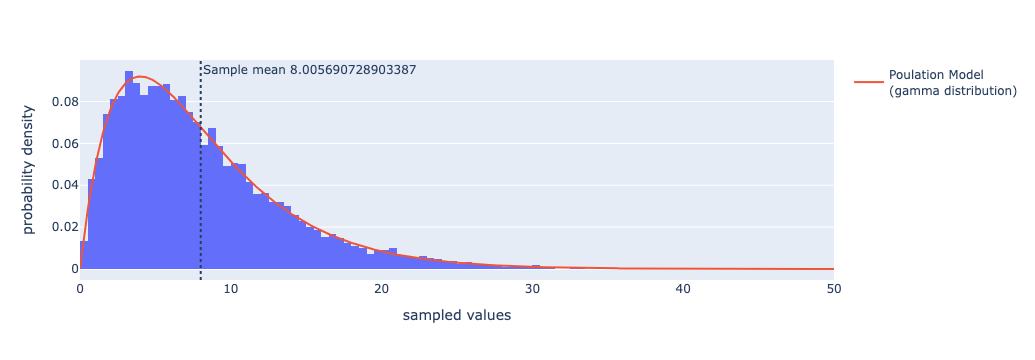

In [8]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

n = 10000 # adjust and experiment with this
# np.random.seed(130)
x = gamma_distribution.rvs(size=n) 

fig = px.histogram(pd.DataFrame({'sampled values': x}), x='sampled values',
                   histnorm='probability density') # so the scale matches the pdf below
fig.add_vline(x=x.mean(), line_dash="dot", annotation_text='Sample mean '+str(x.mean()))

support = np.linspace(0,50,500)
# pdf probability density function
fig.add_trace(go.Scatter(x=support, y=gamma_distribution.pdf(support), 
                         mode='lines', name='Poulation Model<br>(gamma distribution)'))
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS 

# increase the sample size, so the model better represents the population
# gamma is the distribution, the historgram is made from samples of the popualtion. 
# the more samples, the closers to the population model. 
# mean of gamma = aplha * theta

In [10]:
print("shape parameter α is ", population_parameter_alpha_α, "\n",
      "scale parameter θ is ", population_parameter_theta_θ, "\n",
      "shape α times scale θ is ", population_parameter_alpha_α*population_parameter_theta_θ, "\n",
      "population mean (an 'unnamed' gamma population parameter) is ", gamma_distribution.mean(), "\n", 
      "gamma 'unnamed' μ = α * θ", sep="")

shape parameter α is 2
scale parameter θ is 4
shape α times scale θ is 8
population mean (an 'unnamed' gamma population parameter) is 8.0
gamma 'unnamed' μ = α * θ


We care about the sample mean, to estimate the parameter. We are trying to estimate the population. 


Do you know why there is variability/uncertainty in statistics and what sample size has to do with it?

Can you sensibly use the words "bootstrapping", "sample", statistic", "population", and "parameters" together in a sentence with little to no problems or concerns? 

You would NEVER EVER NOT EVER POSSIBLY EVEN CONSIDER SAYING, "There's a 95% chance the parameter is in this confidence interval", right? Right??

In [14]:
#https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

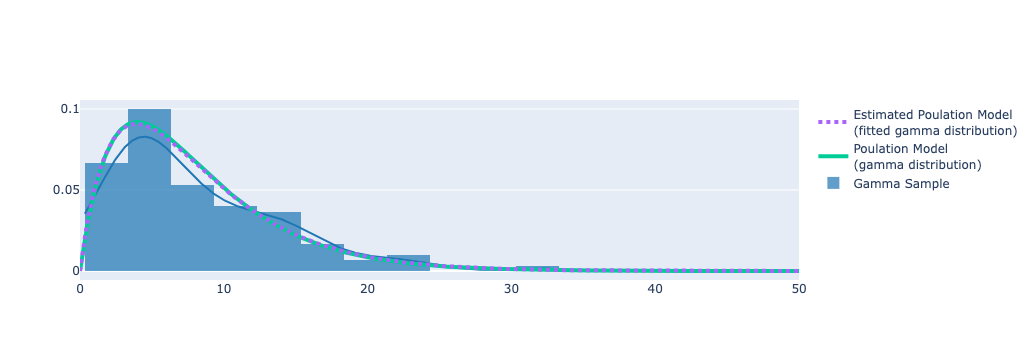

In [16]:
n = 100 # adjust and experiment with this
x = gamma_distribution.rvs(size=n) 

import plotly.figure_factory as ff

hist_data = [x]
group_labels = ['Gamma Sample']
fig = ff.create_distplot(hist_data, group_labels, show_hist=True, 
                         show_rug=False, bin_size=3)

fig.add_trace(go.Scatter(x=support, y=gamma_distribution.pdf(support), 
                         mode='lines', line=dict(width=4), name='Poulation Model<br>(gamma distribution)'))

# floc = 0 makes the loc = 0
# These are statistics, calculated on the sample.
# The statistics calculated from the samples is used to draw a
# estimated population model.
a, loc, scale = stats.gamma.fit(x, floc=0)
fig.add_trace(go.Scatter(x=support, 
                         y=stats.gamma(a=a, scale=scale).pdf(support),
                         mode='lines', line=dict(dash='dot', width=4), name='Estimated Poulation Model<br>(fitted gamma distribution)'))

fig.show()

The blue line is the KDE. KDE version of the sample histogram
The Green line is the gamma distribution of the population
The purple dotted line is the 

In [18]:
n = 100 # adjust and experiment with this
x = gamma_distribution.rvs(size=n) 

# `floc=0` means `loc` does not shift gamma left or right
a, loc, scale = stats.gamma.fit(x, floc=0)

print("Actual shape `population_parameter_alpha_α` is ", 
      gamma_distribution.kwds['a'], "\n",
      "Actual scale `population_parameter_theta_θ` is ",
      gamma_distribution.kwds['scale'], "\n",
      "Esimated population shape parameter is ", a, "\n",
      "Esimated population scale parameter is ", scale, "\n",
      "Esimated population 'unnamed' mean parameter is ", a*scale, "\n",
      "Esimated 'unnamed' mean equal to shape*scale is ",
      stats.gamma(a=a, scale=scale).mean(), sep="")

Actual shape `population_parameter_alpha_α` is 2
Actual scale `population_parameter_theta_θ` is 4
Esimated population shape parameter is 2.2115352707791023
Esimated population scale parameter is 3.6612635750432614
Esimated population 'unnamed' mean parameter is 8.097013531826963
Esimated 'unnamed' mean equal to shape*scale is 8.097013531826963


In [20]:
# load / reset df
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/2e9bd5a67e09b14d01f616b00f7f7e0931515d24/data/2020/2020-07-07/coffee_ratings.csv")
df = df.rename(columns={'country_of_origin': 'origin', 'total_cup_points': 'points'})

df = df[df['points']>65] # ignore some very low scores
df = df[~df['origin'].isna()] # remove rows with unknown origin

df['origin'] = df['origin'].str.replace("?","'") # fix character encoding issue
df['origin_original'] = df.origin.copy().values # save original (corrected) names

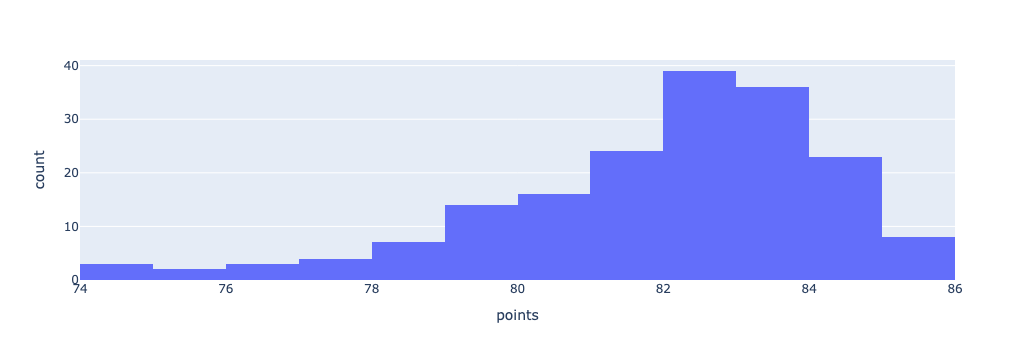

In [22]:
# just run to get to the plot -- we are not interested in reviewing this code now

# add line breaks to titles
df.origin = df.origin_original.str.replace(" (", "<br>(").replace(", ", ",<br>")

fig = px.histogram(df[df.origin=='Guatemala'][1:], x='points')
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


Wouldnt go for a normal distribution becasuse it skewed. 
This looks more like a gamma distribution 
but the skew is left and usually a gamma distribution is right. 

Need to flip the gram.

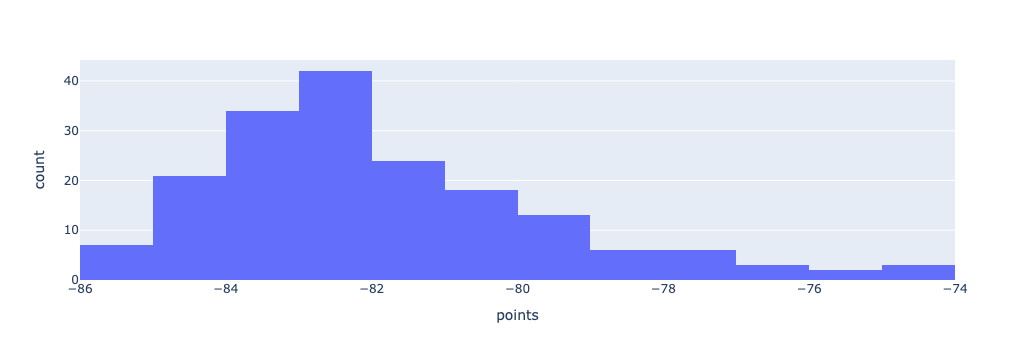

In [24]:
df.loc[df.origin=='Guatemala', 'points'] = \
    -df.loc[df.origin=='Guatemala', 'points'] 
df = df.loc[df.origin=='Guatemala']
df = df[1:].copy()
fig = px.histogram(df[df.origin=='Guatemala'], x='points')
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [26]:
# shift it to be positive
df.loc[df.origin=='Guatemala', 'points'] += 100

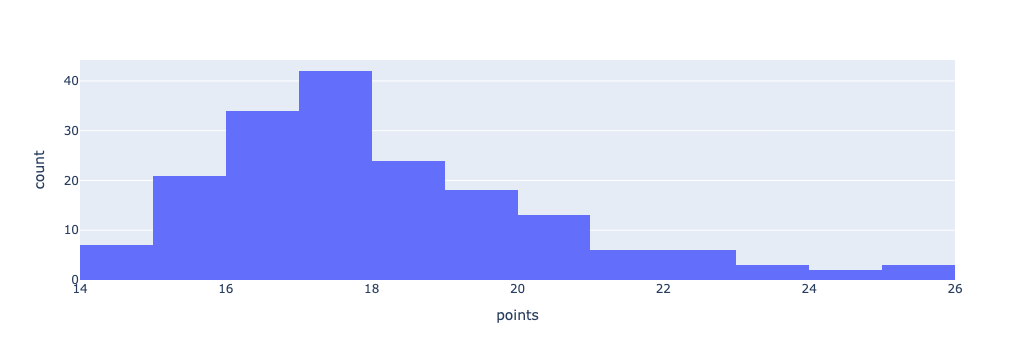

In [28]:
fig = px.histogram(df[df.origin=='Guatemala'], x='points')
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

We have used log transformation before to change the data to work with out tools well.
This is the same idea, we are transformating the data. 

Flip it and translate it right so the data is > 0 
and it is right skewed like a gamma distribution 

Once you are down adding the gamma distribution, we need to convert it back to the original data / scale. 

(go to scale where we can work). Log transform, unable to work with the data if its not in log.

Area of a gamma distribution is always 1.

In [30]:
# The dsitribution needs to start right at 0. 
a, loc, scale = \
stats.gamma.fit(df.loc[df.origin=='Guatemala', 'points'].values)

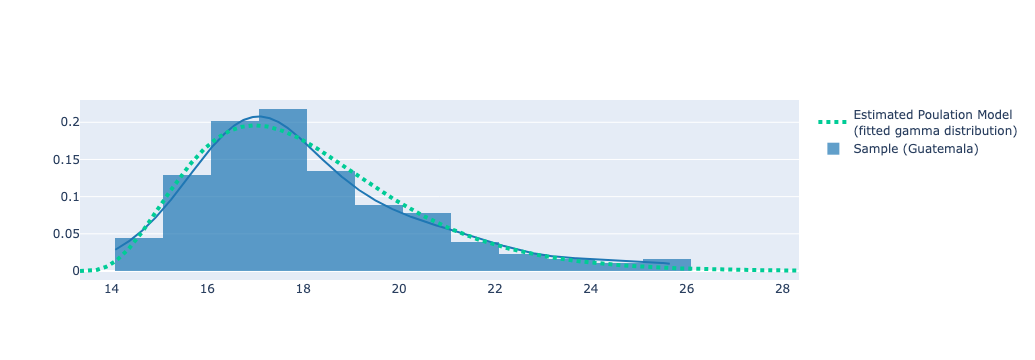

In [32]:
hist_data = [df.loc[df.origin=='Guatemala', 'points'].values]
group_labels = ['Sample (Guatemala)']
fig = ff.create_distplot(hist_data, group_labels, show_hist=True, 
                         show_rug=False, bin_size=1)

support = np.linspace(0,15,500)

fig.add_trace(go.Scatter(x=support+loc, 
                         y=stats.gamma(a=a, scale=scale).pdf(support),
                         mode='lines', line=dict(dash='dot', width=4), name='Estimated Poulation Model<br>(fitted gamma distribution)'))

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
# Fitted gamma distribution for this sample. is the green line. 
# The fit function did some math and use it as the parameters of a new 
# gamma distribution. 

In [34]:
n = (df.origin=='Guatemala').sum()
print("Original sample size", n)

simulations = 1000
a_simulations = np.zeros(simulations)
loc_simulations = np.zeros(simulations)
scale_simulations = np.zeros(simulations)
xbar_simulations = np.zeros(simulations)

for i in range(simulations):
    simulated_sample = stats.gamma(a=a, loc=loc, scale=scale).rvs(size=n)
    a_simulations[i], \
    loc_simulations[i], \
    scale_simulations[i] = stats.gamma.fit(simulated_sample)
    xbar_simulations[i] = simulated_sample.mean()

Original sample size 179


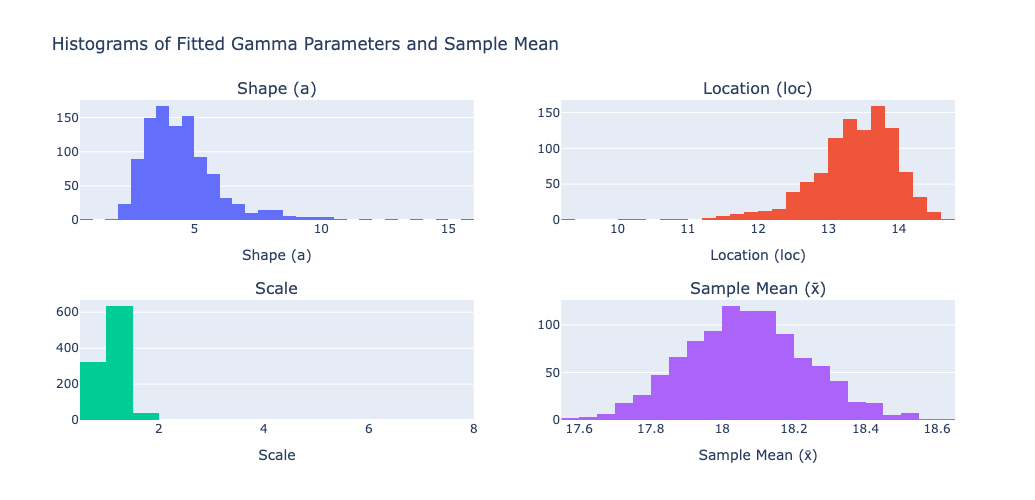

In [36]:
import plotly.subplots as sp
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=("Shape (a)", "Location (loc)", "Scale", "Sample Mean (x̄)"))
fig.add_trace(go.Histogram(x=a_simulations, nbinsx=30, name="Shape (a)", showlegend=False), row=1, col=1)
fig.add_trace(go.Histogram(x=loc_simulations, nbinsx=30, name="Location (loc)", showlegend=False), row=1, col=2)
fig.add_trace(go.Histogram(x=scale_simulations, nbinsx=30, name="Scale", showlegend=False), row=2, col=1)
fig.add_trace(go.Histogram(x=xbar_simulations, nbinsx=30, name="Sample Mean (x̄)", showlegend=False), row=2, col=2)
fig.update_layout(height=500, width=600, title_text="Histograms of Fitted Gamma Parameters and Sample Mean")
fig.update_xaxes(title_text="Shape (a)", row=1, col=1)
fig.update_xaxes(title_text="Location (loc)", row=1, col=2)
fig.update_xaxes(title_text="Scale", row=2, col=1)
fig.update_xaxes(title_text="Sample Mean (x̄)", row=2, col=2)
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

What is the best gamma distribution using fit for each simulation of the data. 
EAch simulation calculated 4 statistics and sotres it in a list.
- Alpha
- Theta
- loc
- mean

Sampling distribution. 

Sample from the sample

Population of the statistic calculated on the samples. 

Sampling distribution of X bar
Sampling distribution of the scale
Sampling distrubtion of loc
sampling distribtuion of shape()

It is a distribution of the n samples. 
distribution of averages of 
It shows variablility and uncertainity. 

How good is x bar at calculating the population mean?
That is waht this tells you.

In [38]:
n = (df.origin=='Guatemala').sum()
print("Original sample size", n)

bootstrap_samples = 1000
a_bootstrapped = np.zeros(bootstrap_samples)
loc_bootstrapped = np.zeros(bootstrap_samples)
scale_bootstrapped = np.zeros(bootstrap_samples)
xbar_bootstrapped = np.zeros(bootstrap_samples)

for i in range(bootstrap_samples):
    # simulated_sample = stats.gamma(a=a, loc=loc, scale=scale).rvs(size=n)
    # This is now bootstrapping
    simulated_sample = df.sample(n=n, replace=True).points
    a_bootstrapped[i], \
    loc_bootstrapped[i], \
    scale_bootstrapped[i] = stats.gamma.fit(simulated_sample)
    xbar_bootstrapped[i] = simulated_sample.mean()

Original sample size 179


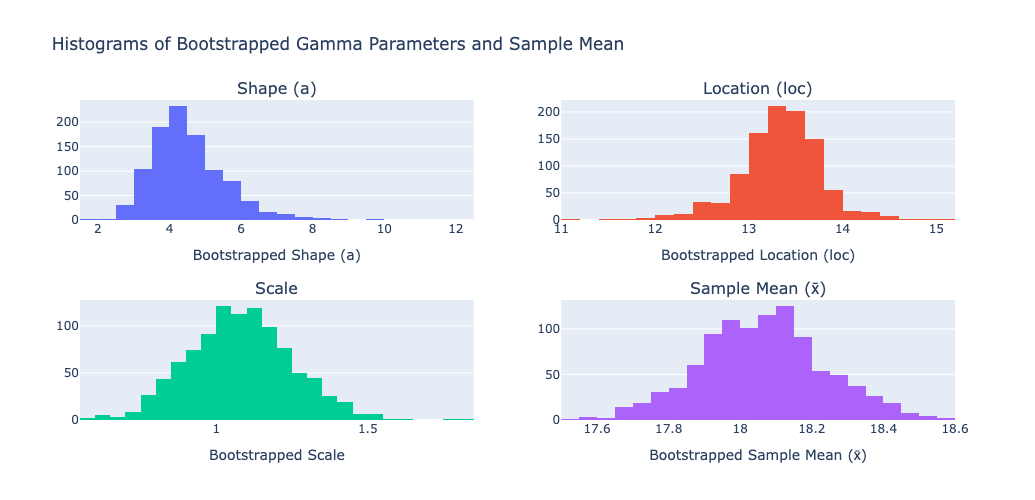

In [40]:
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=("Shape (a)", "Location (loc)", "Scale", "Sample Mean (x̄)"))
fig.add_trace(go.Histogram(x=a_bootstrapped, nbinsx=30, name="Bootstrapped Shape (a)", showlegend=False), row=1, col=1)
fig.add_trace(go.Histogram(x=loc_bootstrapped, nbinsx=30, name="Bootstrapped Location (loc)", showlegend=False), row=1, col=2)
fig.add_trace(go.Histogram(x=scale_bootstrapped, nbinsx=30, name="Bootstrapped Scale", showlegend=False), row=2, col=1)
fig.add_trace(go.Histogram(x=xbar_bootstrapped, nbinsx=30, name="Bootstrapped Sample Mean (x̄)", showlegend=False), row=2, col=2)
fig.update_layout(height=500, width=600, title_text="Histograms of Bootstrapped Gamma Parameters and Sample Mean")
fig.update_xaxes(title_text="Bootstrapped Shape (a)", row=1, col=1)
fig.update_xaxes(title_text="Bootstrapped Location (loc)", row=1, col=2)
fig.update_xaxes(title_text="Bootstrapped Scale", row=2, col=1)
fig.update_xaxes(title_text="Bootstrapped Sample Mean (x̄)", row=2, col=2)
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

I think before they were sampling from a gamma distribution (a population)

Now I think the code is sampling from coffee scores. It is independent choice from the same original 'point' from the original sample.

Boootstrapping is pretending the sample is the population.



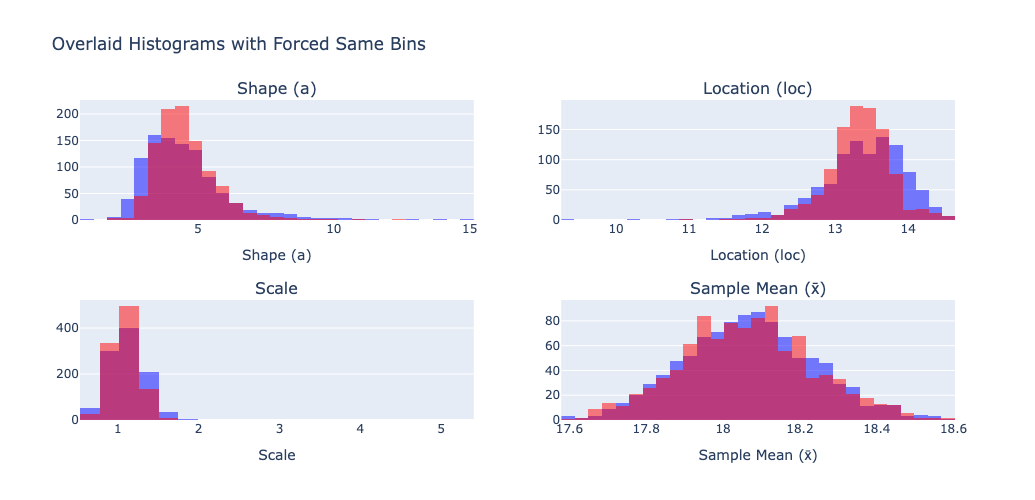

In [42]:

# Define bins (same for both original and bootstrapped histograms)
bin_edges_a = np.histogram_bin_edges(a_simulations, bins=30)
bin_edges_loc = np.histogram_bin_edges(loc_simulations, bins=30)
bin_edges_scale = np.histogram_bin_edges(scale_simulations, bins=30)
bin_edges_xbar = np.histogram_bin_edges(xbar_simulations, bins=30)

# Create 2x2 subplots
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=("Shape (a)", "Location (loc)", "Scale", "Sample Mean (x̄)"))

# Overlay original and bootstrapped histograms with transparency and forced same bins
# Plot Shape (a)
fig.add_trace(go.Histogram(x=a_simulations, xbins=dict(start=bin_edges_a[0], end=bin_edges_a[-1], size=np.diff(bin_edges_a)[0]),
                           name="Shape (a)", opacity=0.5, marker_color='blue', showlegend=False), row=1, col=1)
fig.add_trace(go.Histogram(x=a_bootstrapped, xbins=dict(start=bin_edges_a[0], end=bin_edges_a[-1], size=np.diff(bin_edges_a)[0]),
                           name="Bootstrapped Shape (a)", opacity=0.5, marker_color='red', showlegend=False), row=1, col=1)

# Plot Location (loc)
fig.add_trace(go.Histogram(x=loc_simulations, xbins=dict(start=bin_edges_loc[0], end=bin_edges_loc[-1], size=np.diff(bin_edges_loc)[0]),
                           name="Location (loc)", opacity=0.5, marker_color='blue', showlegend=False), row=1, col=2)
fig.add_trace(go.Histogram(x=loc_bootstrapped, xbins=dict(start=bin_edges_loc[0], end=bin_edges_loc[-1], size=np.diff(bin_edges_loc)[0]),
                           name="Bootstrapped Location (loc)", opacity=0.5, marker_color='red', showlegend=False), row=1, col=2)

# Plot Scale
fig.add_trace(go.Histogram(x=scale_simulations, xbins=dict(start=bin_edges_scale[0], end=bin_edges_scale[-1], size=np.diff(bin_edges_scale)[0]),
                           name="Scale", opacity=0.5, marker_color='blue', showlegend=False), row=2, col=1)
fig.add_trace(go.Histogram(x=scale_bootstrapped, xbins=dict(start=bin_edges_scale[0], end=bin_edges_scale[-1], size=np.diff(bin_edges_scale)[0]),
                           name="Bootstrapped Scale", opacity=0.5, marker_color='red', showlegend=False), row=2, col=1)

# Plot Sample Mean (x̄)
fig.add_trace(go.Histogram(x=xbar_simulations, xbins=dict(start=bin_edges_xbar[0], end=bin_edges_xbar[-1], size=np.diff(bin_edges_xbar)[0]),
                           name="Sample Mean (x̄)", opacity=0.5, marker_color='blue', showlegend=False), row=2, col=2)
fig.add_trace(go.Histogram(x=xbar_bootstrapped, xbins=dict(start=bin_edges_xbar[0], end=bin_edges_xbar[-1], size=np.diff(bin_edges_xbar)[0]),
                           name="Bootstrapped Sample Mean (x̄)", opacity=0.5, marker_color='red', showlegend=False), row=2, col=2)

# Update layout to overlay the histograms
fig.update_layout(height=500, width=600, title_text="Overlaid Histograms with Forced Same Bins", barmode='overlay')

# Update x-axis labels
fig.update_xaxes(title_text="Shape (a)", row=1, col=1)
fig.update_xaxes(title_text="Location (loc)", row=1, col=2)
fig.update_xaxes(title_text="Scale", row=2, col=1)
fig.update_xaxes(title_text="Sample Mean (x̄)", row=2, col=2)

# Show the figure
fig.show()

You are never gonna know the population
The first example is not realistic because the population is never really known. In the real world, we don't know what the distribution is, we only have samples. Pretend the sample is population and bootstrap the sample. 

The confidence interval is going to take 95%. look at the sample mean. The 95% confidence intervals can help us guess that the population mean falls inbetween there, but it is not guarenteed. We are sure however, that 95% of time we bootstrap a sample it will fall between there.

In [44]:
np.quantile(xbar_simulations,[0.025,0.975])


array([17.74352219, 18.41564685])

In [46]:
np.quantile(xbar_bootstrapped,[0.025,0.975])

array([17.70847905, 18.42431704])

95% bootstrap confidence interval
95% of the time it workds

Be careful how you think about this. 

This means, imagine the hypothetical n universes with different samples. We all construct statistics. The statistics from those different universes will capture the confidence interval. 5 % of the universe will get a sample where the statistics are not inside the 85% confidence interval. 

This is different that saying there is a 95% the true parameter is in the confidence interval. The Parameter is a characteristic of the population, so we can't suggest parameter is between a range of numbers.

Confidence is an important word, so we all know what we are talking about.